In [1]:
import pymc3 as pm
import komatsu
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.size"] = 18

In [2]:
hasaki_names, hasaki = komatsu.load_data(komatsu.HASAKI_NAMES, komatsu.HASAKI)
mamouryo_names, mamouryo = komatsu.load_data(komatsu.MAMOURYO_NAMES, komatsu.MAMOURYO)
sessaku_names, sessaku = komatsu.load_data(komatsu.SESSAKU_NAMES, komatsu.SESSAKU)

In [3]:
raw_y = mamouryo[0]
raw_X = hasaki
print(raw_y.shape, raw_X.shape)

(50,) (37, 50)


In [4]:
raw_X, raw_y = komatsu.normalize(raw_X, raw_y)  

In [5]:
n_features = raw_X.shape[0]

with pm.Model() as model:
#     alphas = pm.HalfNormal("alphas", sd=1, shape=(n_features,))
#     beta = pm.HalfNormal("beta", sd=1)
    alphas = pm.HalfCauchy("alphas", beta=5, shape=(n_features,))
    beta = pm.HalfCauchy("beta", beta=5)
    
    w = pm.Normal("w", mu=0.0, tau=alphas, shape=(n_features,))
    mu = 0
    for i in range(n_features):
        mu += w[i] * raw_X[i] 
    print(mu.shape)
    z = pm.Normal("z", mu=mu, tau=beta, observed=raw_y)
    trace = pm.sample(2000, init="advi", n_init=1000)

Shape.0


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 2,783: 100%|██████████| 1000/1000 [00:00<00:00, 1025.90it/s] 
Finished [100%]: Average Loss = 2,776.1
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [w, beta, alphas]
Sampling 2 chains: 100%|██████████| 5000/5000 [03:35<00:00, 14.67draws/s]
/Users/kumada/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/kumada/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dt

In [6]:
pm.summary(trace).round(2)

/Users/kumada/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/kumada/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
w__0,0.05,0.37,0.01,-0.75,0.80,1575.15,1.00
w__1,0.00,0.75,0.03,-1.69,1.47,707.69,1.00
w__2,0.02,0.85,0.02,-1.60,1.69,1281.27,1.00
w__3,0.05,0.82,0.02,-1.54,1.43,887.35,1.00
w__4,0.10,0.83,0.03,-1.41,1.62,948.59,1.00
w__5,0.01,0.76,0.02,-1.22,1.62,1360.98,1.00
w__6,0.00,0.71,0.02,-1.50,1.40,1559.54,1.00
w__7,0.02,0.76,0.02,-1.58,1.36,905.55,1.01
w__8,-0.01,0.80,0.02,-1.46,1.58,1198.55,1.00
w__9,-0.01,0.39,0.01,-0.86,0.75,2534.63,1.00


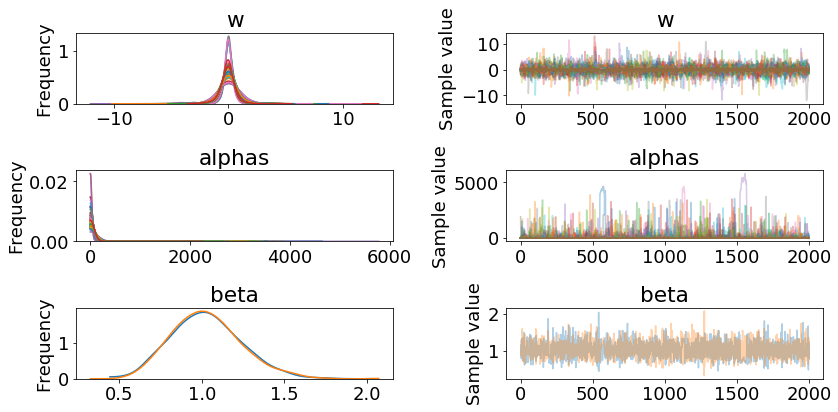

In [7]:
pm.traceplot(trace)
plt.show()

In [8]:
sample_size = trace["w"].shape
print(sample_size)

(4000, 37)


In [9]:
ppc = pm.sample_posterior_predictive(trace, samples=1000, model=model)

100%|██████████| 1000/1000 [00:00<00:00, 1082.62it/s]


In [10]:
ppc_z = ppc["z"]
ppc_z.shape

(1000, 50)

In [11]:
ppc_z_mean = np.mean(ppc_z, axis=0)
ppc_z_std = np.std(ppc_z, axis=0)
print(ppc_z_mean.shape)
print(ppc_z_std.shape)

(50,)
(50,)


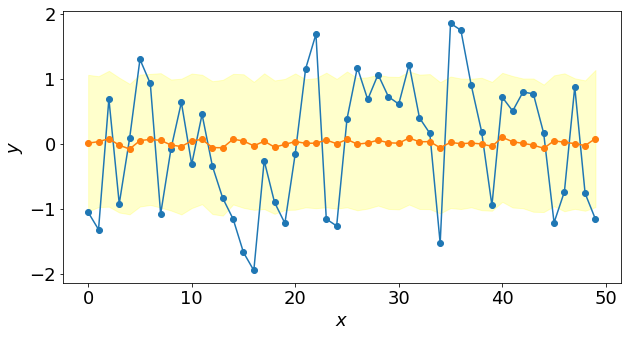

In [12]:
plt.figure(figsize=(10, 5))
xs = range(50)
plt.plot(xs, raw_y, marker="o")
plt.plot(xs, ppc_z_mean, marker="o")

plt.xlabel("$x$")
plt.ylabel("$y$")

plt.fill_between(xs, ppc_z_mean - ppc_z_std, ppc_z_mean + ppc_z_std, color='yellow', alpha=0.2)

plt.show()

In [13]:
tw= trace["w"]
print(tw.shape)

(4000, 37)


In [14]:
tw_mean = np.mean(tw, axis=0)
tw_std = np.std(tw, axis=0)
print(tw_mean.shape)
print(tw_std.shape)

(37,)
(37,)


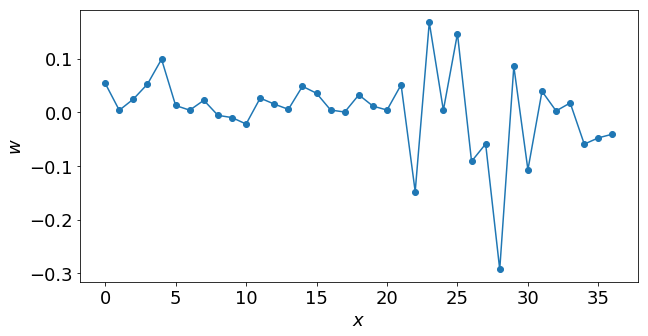

In [15]:
plt.figure(figsize=(10, 5))
xs = range(tw_std.shape[0])
plt.plot(xs, tw_mean, marker="o")

plt.xlabel("$x$")
plt.ylabel("$w$")

# plt.fill_between(xs, tw_mean - tw_std, tw_mean + tw_std, color='yellow', alpha=0.2)

plt.show()

In [16]:
for i, v in enumerate(tw_mean):
    print("[{:0>2}]{}: {}".format(i, hasaki_names[i], v))

[00]ｼﾝﾆﾝｸﾞ角: 0.05395884327908786
[01]補正角: 0.003719385361331177
[02]2番面幅: 0.024504543419286227
[03]ｼﾝﾆﾝｸﾞ逃げ角: 0.052403010960730016
[04]ｼﾝﾆﾝｸﾞ部すくい角: 0.09866641342365746
[05]凸R大きさ: 0.01258311387827879
[06]2番-3番稜線間ｷﾞｬｯﾌﾟ: 0.0038618844681110255
[07]切れ刃ｷﾞｬｯﾌﾟ: 0.02230481090228188
[08]3番ｼﾝﾆﾝｸﾞ-稜線間ｷﾞｬｯﾌﾟ: -0.005710101496207932
[09]先端角: -0.009915752531433229
[10]ﾘｯﾌﾟﾊｲﾄ: -0.021917913950993382
[11]2番逃げ角: 0.026331369991159335
[12]3番逃げ角: 0.015203790079574541
[13]ﾎｰﾆﾝｸﾞ幅1_切れ刃1: 0.005435058151204017
[14]ﾎｰﾆﾝｸﾞ幅1_切れ刃2: 0.04831499020726076
[15]ﾎｰﾆﾝｸﾞ幅1_平均値: 0.03532850193609247
[16]ﾎｰﾆﾝｸﾞ幅2_切れ刃1: 0.004108960195969812
[17]ﾎｰﾆﾝｸﾞ幅2_切れ刃2: 0.0004223376667693553
[18]ﾎｰﾆﾝｸﾞ幅2_平均値: 0.03238638649272955
[19]ﾎｰﾆﾝｸﾞ幅3_切れ刃1: 0.011494939809459419
[20]ﾎｰﾆﾝｸﾞ幅3_切れ刃2: 0.004123375258024415
[21]ﾎｰﾆﾝｸﾞ幅3_平均値: 0.051055966505053806
[22]ﾎｰﾆﾝｸﾞ角度1_切れ刃1: -0.14769471886368904
[23]ﾎｰﾆﾝｸﾞ角度1_切れ刃2: 0.16734868914061252
[24]ﾎｰﾆﾝｸﾞ角度1_平均値: 0.003819134820367905
[25]ﾎｰﾆﾝｸﾞ角度2_切れ刃1: 0.14640952427467985
[26]ﾎｰﾆﾝｸﾞ角度2_切れ刃2: -0.0914669473